In [1]:
#task..using advanced machine learning concepts to build a model which can do price prediction (location=India)
#credits to kaggle for the dataset...link...https://www.kaggle.com/jassican/house-price-prediction-challenge-machine-hack

In [2]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize']=(20,10)

In [3]:
df=pd.read_csv('C://Users/sojore/Documents/project 4 t.b.d-challenge/Train.csv')
test=pd.read_csv('C://Users/sojore/Documents/project 4 t.b.d-challenge/Test.csv')
test.shape

(68720, 11)

In [4]:
df.shape

(29451, 12)

In [5]:
#exploring the dataset
df.groupby('POSTED_BY')['POSTED_BY'].agg('count')

POSTED_BY
Builder      622
Dealer     18291
Owner      10538
Name: POSTED_BY, dtype: int64

In [6]:
df.BHK_OR_RK.unique()

array(['BHK', 'RK'], dtype=object)

In [7]:
#dropping some columns which wont contribute much into creating a better perfomimg price prediction model
df1=df.drop(['POSTED_BY','BHK_OR_RK','LONGITUDE','LATITUDE'],axis='columns')
df1.shape

(29451, 8)

In [8]:
df1.head(4)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,TARGET(PRICE_IN_LACS)
0,0,0,2,1300.236407,1,1,"Ksfc Layout,Bangalore",55.0
1,0,0,2,1275.000000,1,1,"Vishweshwara Nagar,Mysore",51.0
2,0,0,2,933.159722,1,1,"Jigani,Bangalore",43.0
3,0,1,2,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",62.5


In [9]:
#handling any missing values
df1.isnull().any()

UNDER_CONSTRUCTION       False
RERA                     False
BHK_NO.                  False
SQUARE_FT                False
READY_TO_MOVE            False
RESALE                   False
ADDRESS                  False
TARGET(PRICE_IN_LACS)    False
dtype: bool

In [10]:
#seems we dont have any missing values,next we explore each individual column
df1.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,30000.000000


In [11]:
df1.ADDRESS.unique()

array(['Ksfc Layout,Bangalore', 'Vishweshwara Nagar,Mysore',
       'Jigani,Bangalore', ..., 'west mambalam,Chennai',
       'Gandhi Nagar,Gulbarga', 'E3-108, Lake View Recidency,,Vapi'],
      dtype=object)

In [12]:
#converting address column into a single string with no commas separating the wording
#so i will write the below function to do the conversion
def convert_comma_to_string(x):
    res=x.split(',')
    y=len(res)
    if y==6:
        return res[0]+res[1]+res[2]+res[3]+res[4]+res[5]
    elif y==5:
        return res[0]+res[1]+res[2]+res[3]+res[4]
    elif y==4:
        return res[0]+res[1]+res[2]+res[3]
    elif y==3:
        return res[0]+res[1]+res[2]
    elif y==2:
        return res[0]+res[1]
    elif y==1:
        return res[0]
    else:
        return None
        
convert_comma_to_string('E3-108, Lake View Recidency,,Vapi')

'E3-108 Lake View RecidencyVapi'

In [13]:
#applying the function on the  address column
df1.ADDRESS=df1.ADDRESS.apply(convert_comma_to_string)
df1.head(5)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,TARGET(PRICE_IN_LACS)
0,0,0,2,1300.236407,1,1,Ksfc LayoutBangalore,55.0
1,0,0,2,1275.000000,1,1,Vishweshwara NagarMysore,51.0
2,0,0,2,933.159722,1,1,JiganiBangalore,43.0
3,0,1,2,929.921143,1,1,Sector-1 VaishaliGhaziabad,62.5
4,1,0,2,999.009247,0,1,New TownKolkata,60.5


In [14]:
df1.isna().sum()

UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [15]:
df2=df1.copy()
df2.sample(2)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,TARGET(PRICE_IN_LACS)
4091,0,0,2,1243.108661,1,1,PallikaranaiChennai,69.9
2038,1,1,3,1104.823498,0,1,Mansarovar ExtensionJaipur,41.0


In [16]:
df2.SQUARE_FT.unique()

array([1300.236407 , 1275.       ,  933.1597222, ..., 1022.641509 ,
        927.0790093,  896.7741935])

In [17]:
#creating a price_per_sqft column
df2['price_per_sqft']=df2['TARGET(PRICE_IN_LACS)']*100000/df2['SQUARE_FT']
df2.head(3)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,TARGET(PRICE_IN_LACS),price_per_sqft
0,0,0,2,1300.236407,1,1,Ksfc LayoutBangalore,55.0,4229.999999
1,0,0,2,1275.000000,1,1,Vishweshwara NagarMysore,51.0,4000.000000
2,0,0,2,933.159722,1,1,JiganiBangalore,43.0,4608.000000


In [18]:
df2.groupby('ADDRESS')['ADDRESS'].agg('count').sort_values(ascending=False)

ADDRESS
ZirakpurChandigarh                               509
WhitefieldBangalore                              230
Raj Nagar ExtensionGhaziabad                     215
Sector-137 NoidaNoida                            139
New TownKolkata                                  131
                                                ... 
Opp new Rahul hospitalNadiad                       1
Opp reliance market near ram lila maidanSurat      1
Opp. EVP Theme Park KuthumbakamChennai             1
Opp. Philia Hospital Tembhode RdPalghar            1
 panvelMumbai                                      1
Name: ADDRESS, Length: 6897, dtype: int64

In [19]:
#i will all columns with a count less than 10 to other
location_stats=df2.groupby('ADDRESS')['ADDRESS'].agg('count')
location_stats[location_stats<20].head()

ADDRESS
 panvelMumbai                                         1
100 Feet RoadAnand                                    1
101yamuna Complex Gokul Vihar Societynh-8 VapiVapi    1
150 Feet Ring RoadRajkot                              2
150 RING ROAD NEAR VRUNDAVAN RESTAURANTBhavnagar      1
Name: ADDRESS, dtype: int64

In [20]:
location_stats_less_than_or_equal_10=location_stats[location_stats<=10]
len(location_stats_less_than_or_equal_10)

6324

In [21]:
df2.ADDRESS=df2.ADDRESS.apply(lambda x: 'other' if x in location_stats_less_than_or_equal_10 else x)
df2.sample(4)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,TARGET(PRICE_IN_LACS),price_per_sqft
25516,0,0,2,1030.065023,1,1,Malad (East)Maharashtra,160.0,15532.999998
22398,1,0,3,1325.000000,0,1,MangoJamshedpur,31.8,2400.000000
8333,0,0,2,1200.000000,1,1,other,60.0,5000.000000
3416,0,0,3,1735.015773,1,1,ZirakpurChandigarh,55.0,3170.000000


In [22]:
##handling outlier detection and removal
df2['BHK_NO.'].unique()

array([ 2,  3,  1,  4,  5,  6, 12,  8, 20, 10,  7,  9, 13, 17, 15, 11],
      dtype=int64)

In [23]:
#seems we gat some homes with more than 10 bhks ,that seems an error to me
df2[df2['SQUARE_FT']/df2['BHK_NO.']<400].head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,TARGET(PRICE_IN_LACS),price_per_sqft
7,0,1,3,1181.012946,1,1,KhararMohali,52.0,4402.999999
25,0,0,2,780.141844,1,1,other,27.5,3525.000000
35,0,0,3,1174.210077,1,1,other,55.0,4683.999999
48,1,1,1,301.917116,0,0,TalojaLalitpur,26.3,8711.000000
60,0,0,3,1150.006900,1,1,Wadala EastLalitpur,250.0,21739.000001


In [24]:
df3=df2[~(df2['SQUARE_FT']/df2['BHK_NO.']<400)]
df3.shape

(25648, 9)

In [25]:
df3.price_per_sqft.describe()

count     25648.000000
mean       7062.112874
std        7265.826410
min           1.000000
25%        3565.000000
50%        5087.500001
75%        7788.999999
max      300000.000000
Name: price_per_sqft, dtype: float64

In [26]:
def remove_price_per_sqft_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('ADDRESS'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [27]:
df4=remove_price_per_sqft_outliers(df3)
df4.shape

(20831, 9)

In [28]:
df4.head(2)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,TARGET(PRICE_IN_LACS),price_per_sqft
0,0,0,3,1282.568807,1,1,6th Phase JP NagarBangalore,69.9,5450.000001
1,0,0,2,1200.087279,1,1,6th Phase JP NagarBangalore,55.0,4583.000000


In [29]:
#defining another function for a scatter plot
def plot_scatter_chart(df,ADDRESS):
    bhk4=df[(df.ADDRESS==ADDRESS) & (df['BHK_NO.']==4)]
    bhk5=df[(df.ADDRESS==ADDRESS) & (df['BHK_NO.']==5)]
    matplotlib.rcParams['figure.figsize']=(20,10)
    plt.scatter(bhk4.SQUARE_FT,bhk4['TARGET(PRICE_IN_LACS)'],color='orange',label='4 BHK',s=50)
    plt.scatter(bhk5.SQUARE_FT,bhk5['TARGET(PRICE_IN_LACS)'],marker='+',color='green',label='5 BHK',s=50)
    plt.xlabel('Square Feet Area')
    plt.ylabel('Price Per Square Feet')
    plt.title(ADDRESS)
    plt.legend()

In [30]:
df4.ADDRESS.unique()

array(['6th Phase JP NagarBangalore', '7th Phase JP NagarBangalore',
       '8th Phase JP NagarBangalore', 'Action Area IIKolkata',
       'Action Area IKolkata', 'AdajanSurat', 'AdityapurJamshedpur',
       'AerocityMohali', 'Ahinsa Khand 1Ghaziabad',
       'Ahinsa Khand 2Ghaziabad', 'AirportKolkata', 'Ajmer RoadJaipur',
       'AkotaVadodara', 'Akshaya NagarBangalore', 'AliporeKolkata',
       'AlkapuriVadodara', 'AlthanSurat', 'Alwar Bhiwadi RoadBhiwadi',
       'Alwar Bypass RoadBhiwadi', 'Amar Shaheed PathLucknow',
       'AmbalipuraBangalore', 'AmbatturChennai', 'AmroliSurat',
       'AmruthahalliBangalore', 'Ananth NagarBangalore',
       'Andheri (East)Lalitpur', 'Andheri (East)Maharashtra',
       'Andheri (East)Mumbai', 'Andheri (West)Lalitpur',
       'Andheri (West)Maharashtra', 'Andheri (West)Mumbai',
       'AnkleshwarBharuch', 'Ankur ViharGhaziabad', 'AtladraVadodara',
       'AttibeleBangalore', 'AundhPune', 'AvadiChennai',
       'BTM 2nd StageBangalore', 'Badlapur (E

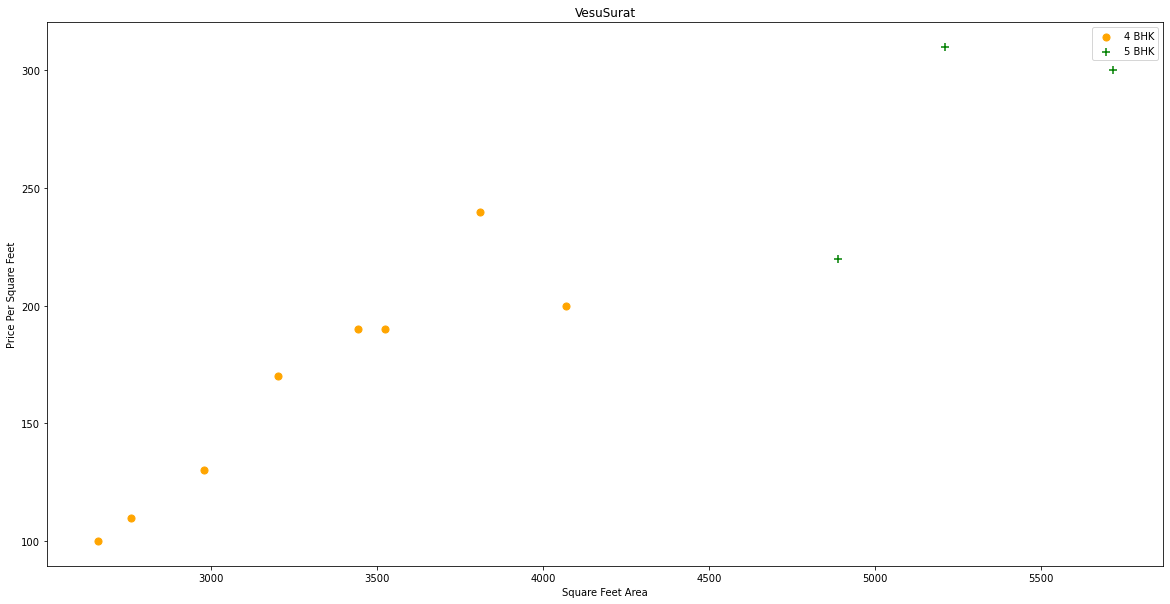

In [31]:
plot_scatter_chart(df4,'VesuSurat')

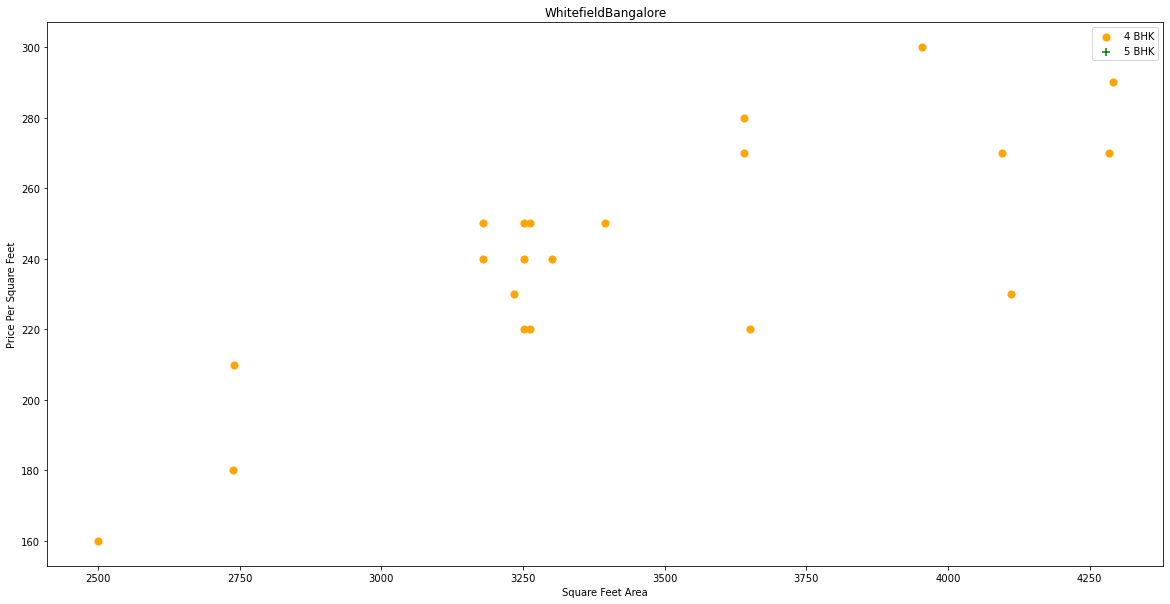

In [32]:
plot_scatter_chart(df4,'WhitefieldBangalore')

In [33]:
df4.head(2)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,TARGET(PRICE_IN_LACS),price_per_sqft
0,0,0,3,1282.568807,1,1,6th Phase JP NagarBangalore,69.9,5450.000001
1,0,0,2,1200.087279,1,1,6th Phase JP NagarBangalore,55.0,4583.000000


In [34]:
#i will a function which is gonna filter homes where a 4 bhk house is expensive than 5 bhk
#for some reasons these results might affect the perfomance of my model
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('ADDRESS'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('BHK_NO.'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
            
        for bhk,bhk_df in location_df.groupby('BHK_NO.'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>50:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [35]:
df5=remove_bhk_outliers(df4)
df5.shape

(15334, 9)

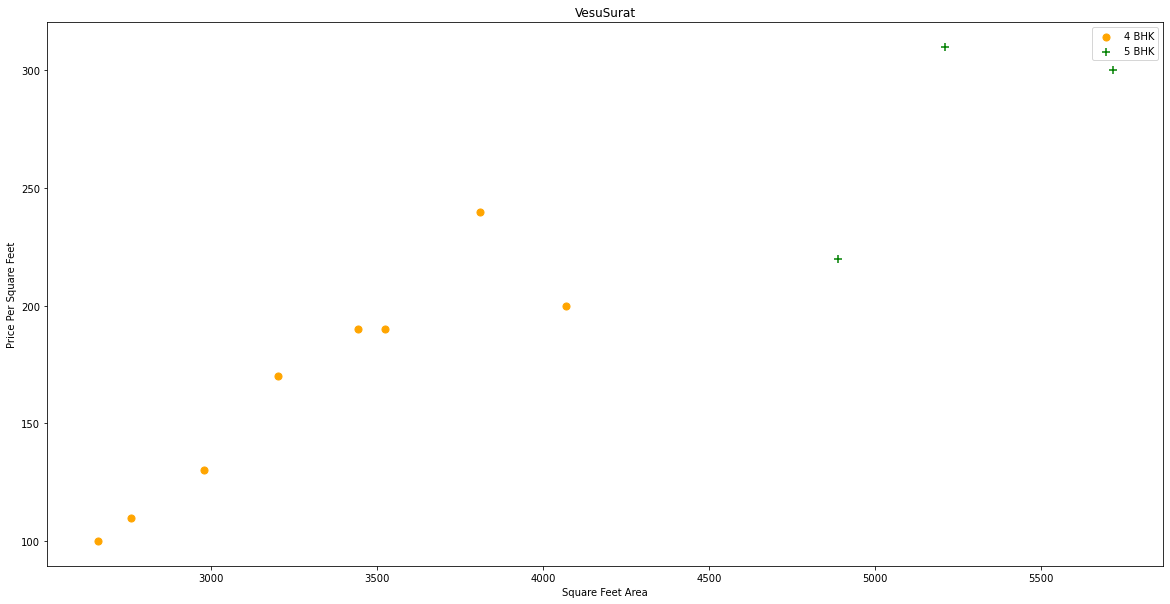

In [36]:
plot_scatter_chart(df5,'VesuSurat')

In [37]:
df5.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,TARGET(PRICE_IN_LACS),price_per_sqft
0,0,0,3,1282.568807,1,1,6th Phase JP NagarBangalore,69.9,5450.000001
1,0,0,2,1200.087279,1,1,6th Phase JP NagarBangalore,55.0,4583.000000
2,0,0,2,1099.796334,1,1,6th Phase JP NagarBangalore,54.0,4910.000000
3,0,0,3,1439.884809,1,1,6th Phase JP NagarBangalore,120.0,8334.000001
4,0,0,2,1100.160440,1,1,6th Phase JP NagarBangalore,48.0,4363.000000


In [38]:
df5['BHK_NO.'].unique()

array([ 3,  2,  4,  1,  5,  6,  8,  7, 12, 10, 13, 17,  9, 15, 20],
      dtype=int64)

In [39]:
df5[df5['BHK_NO.']>=12]

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,TARGET(PRICE_IN_LACS),price_per_sqft
11077,0,0,12,6373.486297,1,1,other,200.0,3138.000000
13467,0,0,13,10460.251050,1,1,other,500.0,4779.999998
15026,0,0,17,11000.343760,1,1,other,320.0,2909.000000
16082,0,0,15,15001.153930,1,1,other,650.0,4333.000001
17135,0,0,12,4824.561404,1,1,other,110.0,2280.000000
19382,0,0,15,8000.000000,1,1,other,500.0,6250.000000
19607,0,0,20,11983.122360,1,1,other,710.0,5925.000001
20715,0,0,20,16860.563140,1,1,other,2000.0,11862.000002


In [40]:
#so these homes with so many bhks can affect my model,so i mark them as outliers and remove em
df6=df5[~(df5['BHK_NO.']>=12)]
df6.shape

(15326, 9)

Text(0, 0.5, 'Count')

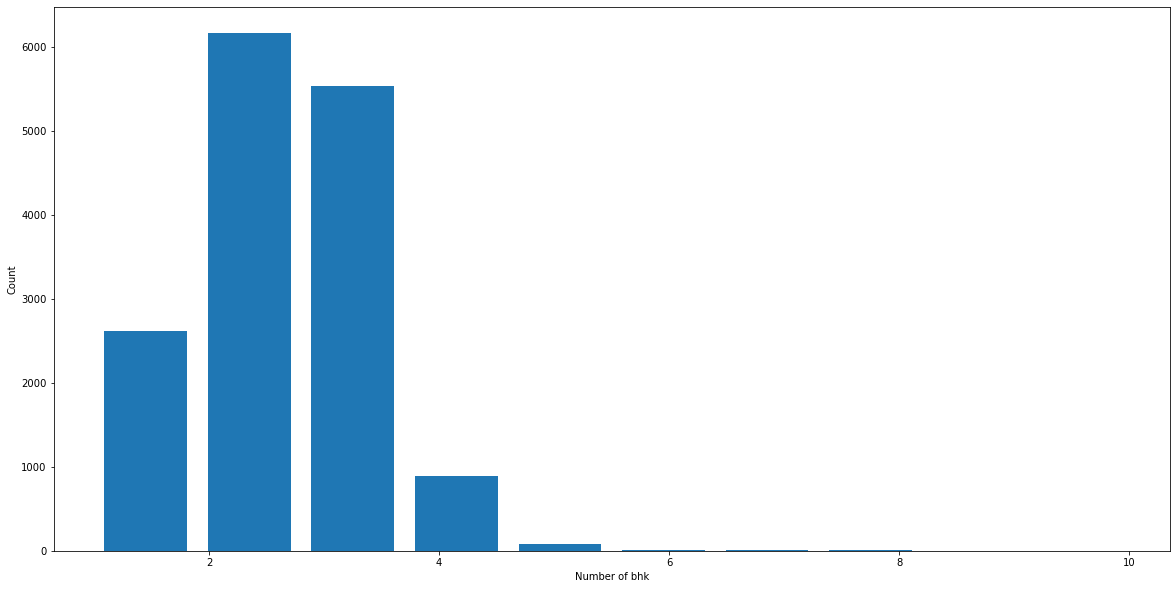

In [41]:
plt.hist(df6['BHK_NO.'],rwidth=0.8)
plt.xlabel('Number of bhk')
plt.ylabel('Count')

In [42]:
#my histogram kinda takes a normal distribution shape based on the bhk no.
#we plot a histogram based on the price per sqft

Text(0, 0.5, 'Count')

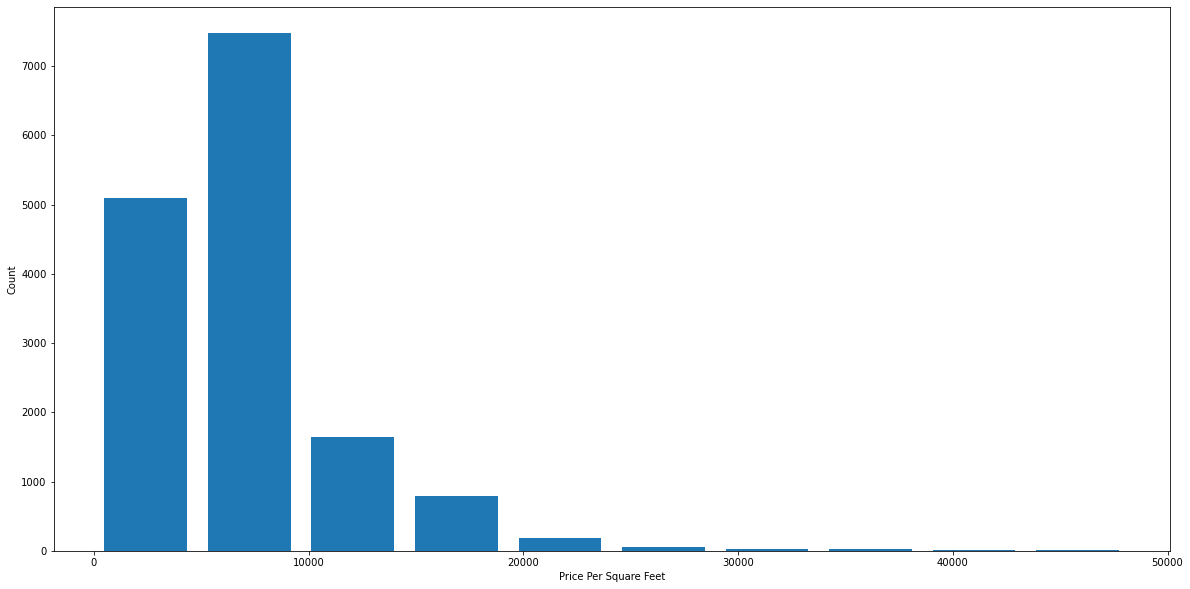

In [43]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df6.price_per_sqft,rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

In [44]:
#so also the above histogram is kinda a normal distribution,it looks pretty cool

In [45]:
df6.head(2)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,TARGET(PRICE_IN_LACS),price_per_sqft
0,0,0,3,1282.568807,1,1,6th Phase JP NagarBangalore,69.9,5450.000001
1,0,0,2,1200.087279,1,1,6th Phase JP NagarBangalore,55.0,4583.000000


In [46]:
#next up is creating dummy variables for the address column
#i will use labelencoder to get the dummy variables 
from sklearn.preprocessing import LabelEncoder
le_df=LabelEncoder()
df6.ADDRESS=le_df.fit_transform(df6.ADDRESS)
df6.sample(4)

C:\Users\sojore\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,TARGET(PRICE_IN_LACS),price_per_sqft
10018,0,1,2,1305.158484,1,1,567,42.00,3217.999999
4089,1,1,2,1070.149254,0,1,255,35.85,3349.999999
11375,0,0,4,4000.000000,1,1,571,600.00,15000.000000
18097,0,0,3,1635.111876,1,1,571,95.00,5810.000000


In [47]:
#now the next task is to work on the test data,handle the missing values ,create dummy variables and get the X_test

In [48]:
#loading the test dataset
test=pd.read_csv('C://Users/sojore/Documents/project 4 t.b.d-challenge/Test.csv')
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [49]:
#dropping unneccesary columns
test1=test.drop(['POSTED_BY','BHK_OR_RK','LONGITUDE','LATITUDE'],axis=1)
test1.head(2)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS
0,0,0,1,545.17134,1,1,"Kamrej,Surat"
1,1,1,2,800.00000,0,0,"Panvel,Lalitpur"


In [50]:
test1.ADDRESS.unique()

array(['Kamrej,Surat', 'Panvel,Lalitpur', 'New Town,Kolkata', ...,
       'Suryanagar,Vadodara', 'Raghavendra Nagar,Pune',
       'Thakurganj,Lucknow'], dtype=object)

In [51]:
#handling the address column
def convert_comma_to_string(x):
    res=x.split(',')
    y=len(res)
    if y==6:
        return res[0]+res[1]+res[2]+res[3]+res[4]+res[5]
    elif y==5:
        return res[0]+res[1]+res[2]+res[3]+res[4]
    elif y==4:
        return res[0]+res[1]+res[2]+res[3]
    elif y==3:
        return res[0]+res[1]+res[2]
    elif y==2:
        return res[0]+res[1]
    elif y==1:
        return res[0]
    else:
        return None
        
convert_comma_to_string('New Town,Kolkata')

'New TownKolkata'

In [52]:
test1.ADDRESS=test1.ADDRESS.apply(convert_comma_to_string)
test1.head()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS
0,0,0,1,545.171340,1,1,KamrejSurat
1,1,1,2,800.000000,0,0,PanvelLalitpur
2,0,0,2,1257.096513,1,1,New TownKolkata
3,0,0,3,1400.329489,1,1,Kalwar RoadJaipur
4,0,0,1,430.477830,1,1,Mai MandirNadiad


In [53]:
df6.shape

(15326, 9)

In [54]:
test1.shape

(68720, 7)

In [55]:
#getting dummie variables for test1 dataset
le_test1=LabelEncoder()
test1.ADDRESS=le_test1.fit_transform(test1.ADDRESS)
test1.sample(4)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS
31563,0,0,2,1273.319514,1,1,8139
47645,0,0,2,1170.212766,1,1,5930
32334,0,0,3,899.805448,1,1,10376
4339,0,1,3,1260.067550,1,1,10080


In [56]:
#preparing my X,y,X_train,y_train,X_test
test1.shape

(68720, 7)

In [57]:
X=df6.drop(['TARGET(PRICE_IN_LACS)','price_per_sqft'],axis='columns')
X.shape

(15326, 7)

In [58]:
y=df6['TARGET(PRICE_IN_LACS)']
y.shape

(15326,)

In [59]:
X.head(3)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS
0,0,0,3,1282.568807,1,1,0
1,0,0,2,1200.087279,1,1,0
2,0,0,2,1099.796334,1,1,0


In [60]:
X_train=X.copy()
X_train.shape

(15326, 7)

In [61]:
y_train=y.copy()
y_train.shape

(15326,)

In [62]:
X_test=test1.copy()
X_test.shape

(68720, 7)

In [63]:
#we now proceed to creating our model(we use gridsearchcv to come with the best model,best parameters)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [64]:
cross_val_score(DecisionTreeRegressor(),X_train,y_train)

array([0.85513484, 0.91707653, 0.94341263, 0.80395003, 0.94723931])

In [65]:
def find_best_model_using_gridsearchcv(X,y):
    models={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
#this is what we call hyper parameter tunning

    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in models.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])


In [66]:
find_best_model_using_gridsearchcv(X_train,y_train)

,model,best_score,best_params
0,linear_regression,0.850903,{'normalize': False}
1,lasso,0.850675,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.934751,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [67]:
#from the above results,decision tree is working pretty good,so am gonn ause it to create my model
model=DecisionTreeRegressor(criterion= 'friedman_mse', splitter= 'random')
model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', splitter='random')

In [68]:
X_train.head(2)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS
0,0,0,3,1282.568807,1,1,0
1,0,0,2,1200.087279,1,1,0


In [69]:
#lets now do some price predictions
model.predict([[0,0,3,1282.568807,1,1,0]])

array([69.9])

In [70]:
y_train[:2]

0    69.9
1    55.0
Name: TARGET(PRICE_IN_LACS), dtype: float64

In [71]:
#now i can get the y_predicted values
y_predicted=model.predict(X_test)
y_predicted[:10]

array([ 22.        , 370.        , 200.        ,  73.        ,
        20.        ,  69.45454545,  19.        ,  47.5       ,
        38.33333333,  70.        ])

In [72]:
#preparing the submission predicted_prices
test['Predicted_Price']=y_predicted
test.head(5)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,Predicted_Price
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700,22.0
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278,370.0
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911,200.0
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600,73.0
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000,20.0


In [73]:
sample_submission_AMLPC=test['Predicted_Price']
sample_submission_AMLPC.head()

0     22.0
1    370.0
2    200.0
3     73.0
4     20.0
Name: Predicted_Price, dtype: float64

In [74]:
sample_submission_AMLPC.to_csv('submission_AMLPC.csv')

In [75]:
#one more last thing is to save my model
X_train.head(2)

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS
0,0,0,3,1282.568807,1,1,0
1,0,0,2,1200.087279,1,1,0


In [85]:
model.predict([[0,0,3,3000,1,1,78]])

array([260.])

In [86]:
#saving the model
import pickle
with open('advanced_ml_pp_chl_model.pickle','wb') as f:
    pickle.dump(model,f)